In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else [])
df["job_skills"] = df["job_skills"].apply(lambda skills: [skill.title() for skill in skills] if len(skills) > 0 else skills)

In [12]:
df_us = df[df["job_country"] == "United States"].copy()

In [ ]:
df_skills = df_us.explode("job_skills")
df_skills[["job_title", "job_skills"]]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,Python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,C++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,Java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,Matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,R
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN
785705,Expert Business Data Analyst - Now Hiring,Sql
785705,Expert Business Data Analyst - Now Hiring,Python


In [4]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

df_skills_count = df_skills_count.reset_index(name="skill_count")

df_skills_count.sort_values("skill_count", ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,Python,Data Scientist,42379
1521,Sql,Data Analyst,34452
1523,Sql,Data Scientist,30034
455,Excel,Data Analyst,27519
1243,R,Data Scientist,26022
...,...,...,...
245,Clojure,Software Engineer,1
1738,Vb.Net,Senior Data Scientist,1
530,Fortran,Machine Learning Engineer,1
1116,Planner,Cloud Engineer,1


In [5]:
job_titles = df_skills_count["job_title_short"].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

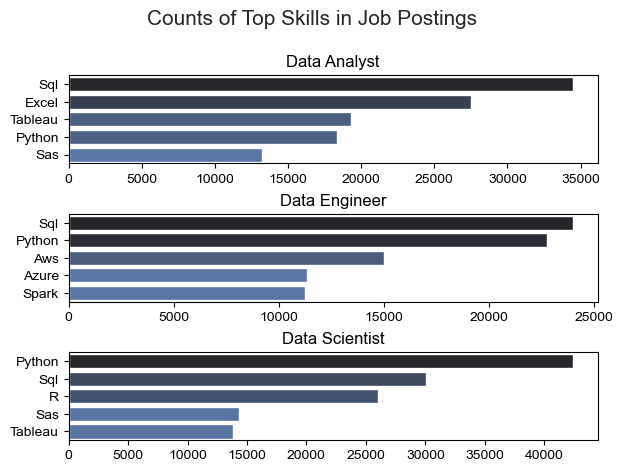

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x="skill_count",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r",
        legend=False
    )
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
  
fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [7]:
df_job_title_count = df_us["job_title_short"].value_counts().reset_index(name="jobs_total")

In [8]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count)

df_skills_perc["skill_percent"] = df_skills_perc["skill_count"] / df_skills_perc["jobs_total"] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,Python,Data Scientist,42379,58830,72.036376
1,Sql,Data Analyst,34452,67816,50.802171
2,Sql,Data Scientist,30034,58830,51.052184
3,Excel,Data Analyst,27519,67816,40.578919
4,R,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,Clojure,Software Engineer,1,1814,0.055127
1866,Vb.Net,Senior Data Scientist,1,12946,0.007724
1867,Fortran,Machine Learning Engineer,1,921,0.108578
1868,Planner,Cloud Engineer,1,423,0.236407


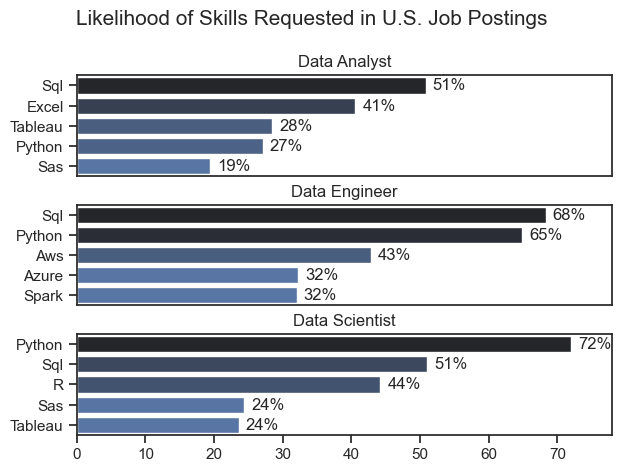

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(
        data=df_plot,
        x="skill_percent",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r",
        legend=False,
    )
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 78)
    
    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
    
    if(i != len(job_titles) - 1):
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in U.S. Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()